In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
from pathlib import Path
import polars as pl

print(Path().absolute())

root_dir = Path.cwd().parents[1]
if not root_dir in sys.path:
    sys.path.insert(0, str(root_dir))
print(root_dir)
# Replace 'your_file.csv' with the path to your CSV file

df = pl.read_csv('../../../data/Treue/pone.0146500.s015.csv')
# df = pl.read_csv("../../../data/Treue/pone.0146500.s016.csv")

/home/wollex/Documents/Science/WolfGroup/DarkMatter/Programme/notebooks/TreueData
/home/wollex/Documents/Science/WolfGroup/DarkMatter/Programme


In [2]:
df.filter(pl.col("trialNum") == 3).filter(pl.col("acond") == "afix")

cellId,channelId,trialNum,acond,angle,rate
str,i64,i64,str,f64,f64
"""vlk-rTask2-har-096-01+01""",1,3,"""afix""",180.0,2.0
"""vlk-rTask2-cls-016-03+02""",1,3,"""afix""",330.0,2.0
"""vlk-rTask2-har-079-01+01""",1,3,"""afix""",0.0,4.0
"""vlk-rTask3-cls-029-01+01""",1,3,"""afix""",240.0,26.0
"""vlk-rTask3-cls-029-01+01""",2,3,"""afix""",270.0,12.0
…,…,…,…,…,…
"""vlk-rTask3-har-112-02+02""",1,3,"""afix""",0.0,0.0
"""vlk-rTask3-har-112-02+02""",2,3,"""afix""",0.0,12.0
"""vlk-rTask3-cls-039-01+01""",1,3,"""afix""",30.0,0.0


In [3]:
# df_filtered = df.filter(pl.col("acond") == "ain")
# df_filtered = df_filtered.filter(pl.col("chann"))
# df_filtered["cellId"].unique()

grouped_df = df.group_by(["cellId", "channelId", "acond", "angle"]).agg(
    pl.col("rate").mean().alias("rate")
)
grouped_df

cellId,channelId,acond,angle,rate
str,i64,str,f64,f64
"""vlk-rTask1-har-094-01+01""",1,"""uni2""",270.0,4.4
"""vlk-rTask2-cls-016-03+02""",1,"""afix""",240.0,17.333333
"""vlk-rTask2-har-087-01+01""",2,"""uni2""",270.0,23.0
"""vlk-rTask1-cls-028-01+01a""",2,"""ain""",180.0,8.25
"""vlk-rTask1-har-107-01+01""",2,"""afix""",90.0,20.0
…,…,…,…,…
"""vlk-rTask1-cls-038-01+01""",2,"""afix""",120.0,22.666667
"""vlk-rTask3-har-112-02+02""",2,"""uni2""",0.0,24.0
"""vlk-rTask1-har-070-01+02""",1,"""uni2""",180.0,12.0


In [4]:
group_size = df.group_by(["cellId", "channelId", "acond", "angle"]).agg(
    pl.col("rate").count().alias("count")
)
# print(f"Number of entries in group: {group_size}")

group_size
# print(grouped_df)

cellId,channelId,acond,angle,count
str,i64,str,f64,u32
"""vlk-rTask1-cls-028-01+01a""",2,"""uni2""",90.0,5
"""vlk-rTask1-har-078-01+01""",1,"""afix""",240.0,5
"""vlk-rTask2-har-058-01+01""",1,"""uni2""",330.0,7
"""vlk-rTask1-har-105-01+01""",2,"""ain""",0.0,6
"""vlk-rTask1-har-097-01+02""",1,"""uni2""",240.0,4
…,…,…,…,…
"""vlk-rTask3-cls-034-03+01""",2,"""ain""",270.0,10
"""vlk-rTask3-cls-019-01+01""",1,"""uni2""",0.0,3
"""vlk-rTask3-cls-039-01+01""",2,"""ain""",0.0,5


In [5]:
grouped_df.filter(pl.col("acond") == "uni2").filter(pl.col("angle") == 0).sort(
    by="cellId"
)

cellId,channelId,acond,angle,rate
str,i64,str,f64,f64
"""vlk-rTask1-cls-021-02+01""",1,"""uni2""",0.0,12.0
"""vlk-rTask1-cls-023-01+01""",1,"""uni2""",0.0,7.0
"""vlk-rTask1-cls-027-01+01""",1,"""uni2""",0.0,5.5
"""vlk-rTask1-cls-028-01+01a""",1,"""uni2""",0.0,3.0
"""vlk-rTask1-cls-028-01+01a""",2,"""uni2""",0.0,2.333333
…,…,…,…,…
"""vlk-rTask3-har-109-01+01""",2,"""uni2""",0.0,8.0
"""vlk-rTask3-har-109-01+01""",1,"""uni2""",0.0,1.333333
"""vlk-rTask3-har-111-01+02""",2,"""uni2""",0.0,16.5


Condition: ain
Condition: uni2
Condition: afix


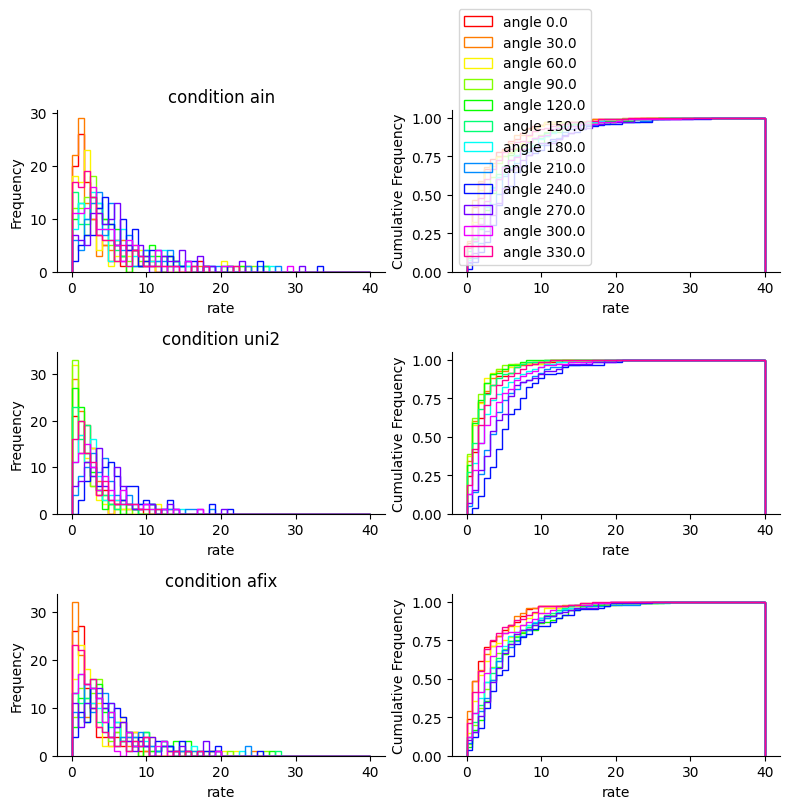

In [6]:
import numpy as np

# To filter all entries where the `angle` column equals a specific value (e.g., 240.0):
unique_conditions = grouped_df["acond"].unique()
unique_angles = grouped_df["angle"].unique()
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
for i, cond in enumerate(unique_conditions):
    print(f"Condition: {cond}")
    df_cond = grouped_df.filter(pl.col("acond") == cond)
    # print(df.filter(pl.col("acond") == cond).describe())

    ax_pdf = fig.add_subplot(len(unique_conditions), 2, i * 2 + 1)
    ax_cdf = fig.add_subplot(len(unique_conditions), 2, i * 2 + 2)

    for angle in unique_angles:
        color = plt.cm.hsv(angle / 360.0)
        options = {
            "bins": np.linspace(0, 40, 51),
            "label": f"angle {angle}",
            "histtype": "step",
            "color": color,
        }
        rates = df_cond.filter(pl.col("angle") == angle)["rate"].to_numpy() / 6.0
        # print(rates.shape)
        ax_pdf.hist(rates, **options)
        ax_cdf.hist(rates, cumulative=True, density=True, **options)
        # plt.title(f"Histogram of rate for angle {angle}")
    ax_pdf.spines[["top", "right"]].set_visible(False)
    ax_cdf.spines[["top", "right"]].set_visible(False)
    plt.setp(ax_pdf, xlabel="rate", ylabel="Frequency")
    plt.setp(ax_cdf, xlabel="rate", ylabel="Cumulative Frequency")

    if i == 0:
        ax_cdf.legend()
    ax_pdf.set_title(f"condition {cond}")
plt.tight_layout()

In [7]:
(grouped_df["rate"] / 6).max()

33.095238095238095

In [9]:
from inference.BayesModel import (
    run_sampling,
    get_mean_from_sampler,
    build_distr_structure_from_params,
)
from inference.HierarchicalModelDefinition import prior_structure
from scipy.special import erfinv


mode = "uni2"  # one of ain afix uni2
# mode = "afix"  # one of ain afix uni2
# mode = "ain"  # one of ain afix uni2
T = 6

halfnorm_ppf = lambda x, loc, scale: loc + scale * np.sqrt(2) * erfinv(x)
norm_ppf = lambda x, mean, sigma: mean + sigma * np.sqrt(2) * erfinv(2 * x - 1)

prior = {}
prior["gamma_0"] = prior_structure(norm_ppf, mean=2.0, sigma=0.5)
prior["delta_0"] = prior_structure(norm_ppf, mean=6.0, sigma=2.0)
# prior["nu_max_0"] = prior_structure(norm_ppf, mean=50.0, sigma=10.0)
prior["nu_max_0"] = prior_structure(
    None,
    value=[35.0],
)

res = {}

df_cond = grouped_df.filter(pl.col("acond") == mode)
for angle in unique_angles:
    spike_counts = (
        df_cond.filter(pl.col("angle") == angle)["rate"].to_numpy().astype(np.float64)
    )

    BM, results, sampler = run_sampling(
        spike_counts[:, np.newaxis],
        T,
        mode="dynesty",
        n_live=100,
        correct_N=0,
        bias_to_expected_max=0,
        bias_to_mean=0,
        priors=prior,
        nP=4,
    )

    # mean = get_mean_from_sampler(sampler, BM.paramNames, mode="dynesty")
    # mean["nu_max_0"] = prior["nu_max_0"]["parameters"]["value"][0]

    # res[angle] = mean
    res[angle] = results

    # params = build_distr_structure_from_params(mean, BM.paramIn)
    # print(params)

running nested sampling


453it [00:00, 544.11it/s, +100 | bound: 3 | nc: 1 | ncall: 6176 | eff(%):  9.101 | loglstar:   -inf < -77.666 <    inf | logz: -81.925 +/-  0.175 | dlogz:  0.008 >  1.000]

running nested sampling



482it [00:00, 564.30it/s, +100 | bound: 3 | nc: 1 | ncall: 6342 | eff(%):  9.324 | loglstar:   -inf < -72.045 <    inf | logz: -76.620 +/-  0.191 | dlogz:  0.008 >  1.000]

running nested sampling



452it [00:00, 593.61it/s, +100 | bound: 2 | nc: 1 | ncall: 5887 | eff(%):  9.539 | loglstar:   -inf < -65.585 <    inf | logz: -69.839 +/-  0.176 | dlogz:  0.008 >  1.000]

running nested sampling



449it [00:00, 616.03it/s, +100 | bound: 2 | nc: 1 | ncall: 5733 | eff(%):  9.746 | loglstar:   -inf < -62.406 <    inf | logz: -66.621 +/-  0.172 | dlogz:  0.008 >  1.000]

running nested sampling



447it [00:00, 599.53it/s, +100 | bound: 2 | nc: 1 | ncall: 5726 | eff(%):  9.723 | loglstar:   -inf < -67.039 <    inf | logz: -71.231 +/-  0.172 | dlogz:  0.008 >  1.000]

running nested sampling



457it [00:00, 638.98it/s, +100 | bound: 3 | nc: 1 | ncall: 6325 | eff(%):  8.948 | loglstar:   -inf < -77.208 <    inf | logz: -81.523 +/-  0.178 | dlogz:  0.008 >  1.000]

running nested sampling



446it [00:00, 611.66it/s, +100 | bound: 3 | nc: 1 | ncall: 6042 | eff(%):  9.189 | loglstar:   -inf < -94.827 <    inf | logz: -99.022 +/-  0.175 | dlogz:  0.008 >  1.000]

running nested sampling



481it [00:00, 630.12it/s, +100 | bound: 4 | nc: 1 | ncall: 7314 | eff(%):  8.054 | loglstar:   -inf < -101.587 <    inf | logz: -106.117 +/-  0.183 | dlogz:  0.008 >  1.000]

running nested sampling



589it [00:00, 665.33it/s, +100 | bound: 6 | nc: 1 | ncall: 9716 | eff(%):  7.165 | loglstar:   -inf < -109.347 <    inf | logz: -114.956 +/-  0.219 | dlogz:  0.008 >  1.000]

running nested sampling



467it [00:00, 623.82it/s, +100 | bound: 3 | nc: 1 | ncall: 6523 | eff(%):  8.828 | loglstar:   -inf < -106.696 <    inf | logz: -111.077 +/-  0.177 | dlogz:  0.008 >  1.000]

running nested sampling



461it [00:00, 626.94it/s, +100 | bound: 3 | nc: 1 | ncall: 6586 | eff(%):  8.649 | loglstar:   -inf < -93.364 <    inf | logz: -97.693 +/-  0.182 | dlogz:  0.008 >  1.000]

running nested sampling



446it [00:00, 592.41it/s, +100 | bound: 3 | nc: 1 | ncall: 6363 | eff(%):  8.718 | loglstar:   -inf < -86.357 <    inf | logz: -90.543 +/-  0.174 | dlogz:  0.008 >  1.000]


In [11]:
res[0].importance_weights()

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.62419073e-296,
       3.80213459e-288, 6.23975804e-274, 4.61517947e-268, 6.38345138e-261,
       2.44153455e-247, 3.53231138e-244, 3.93379552e-243, 2.32032532e-222,
       1.60790777e-213, 4.11560128e-211, 5.45091448e-197, 4.26807869e-186,
       2.65159132e-176, 2.49618998e-168, 4.15348659e-163, 2.53486075e-160,
       7.04374787e-150, 3.04565951e-149, 9.81610491e-148, 2.77871664e-142,
       5.90345419e-142, 7.55128440e-135, 1.40359916e-131, 2.25973011e-120,
       1.54942873e-114, 5.58007928e-112, 4.39829756e-109, 3.48704404e-108,
       9.38819750e-105, 1.22332873e-096, 2.16126189e-089, 2.49113121e-082,
       4.93497059e-081, 1.32826646e-080, 1.36926151e-079, 1.90115564e-075,
       9.82742297e-073, 2.36714138e-072, 1.82567517e-071, 1.15957208e-068,
       1.27969214e-066, 4

['nlive',
 'niter',
 'ncall',
 'eff',
 'samples',
 'blob',
 'samples_id',
 'samples_it',
 'samples_u',
 'logwt',
 'logl',
 'logvol',
 'logz',
 'logzerr',
 'information',
 'bound',
 'bound_iter',
 'samples_bound',
 'scale']

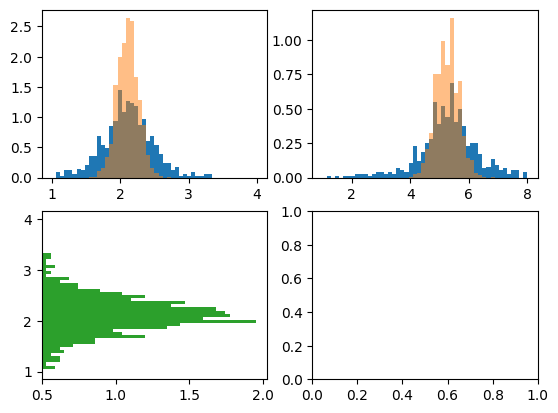

In [22]:
fig, axes = plt.subplots(2, 2)
gamma_arr = np.linspace(1, 4, 51)
axes[0][0].hist(res[0]["samples"][:, 0], bins=gamma_arr, density=True)
axes[0][0].hist(
    res[0]["samples"][:, 0],
    weights=res[0].importance_weights(),
    bins=gamma_arr,
    density=True,
    alpha=0.5,
)

delta_arr = np.linspace(1, 8, 51)
axes[0][1].hist(res[0]["samples"][:, 1], bins=delta_arr, density=True)
axes[0][1].hist(
    res[0]["samples"][:, 1],
    weights=res[0].importance_weights(),
    bins=delta_arr,
    density=True,
    alpha=0.5,
)
# np.histogram(res[0]["samples"][:, 0], bins=gamma_arr, density=True)

axes[1][0].hist(
    res[0]["samples"][:, 0],
    bins=gamma_arr,
    density=True,
    orientation="horizontal",
    bottom=0.5,
    color="tab:green",
)  # ,histtype="step")
res[0].keys()
# -> check matthias notebook to plot posterior distributions

(<Figure size 550x550 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: xlabel='$x_{1}$', ylabel='$x_{2}$'>,
         <Axes: xlabel='$x_{2}$'>]], dtype=object))

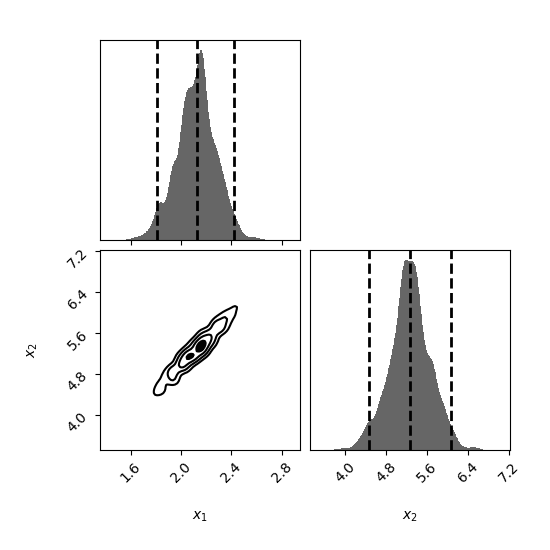

In [ ]:
from dynesty import plotting as dyplot

dyplot.cornerplot(res[0])

gamma_0 mean: 2.112
delta_0 mean: 5.253
{'gamma_0': 2.1118797601945265, 'delta_0': 5.253458308027759, 'nu_max_0': 35.0}
{'distr': [{'gamma': 2.1118797601945265, 'delta': 5.253458308027759, 'nu_max': 35.0}]}


KeyError: 'gamma_0'

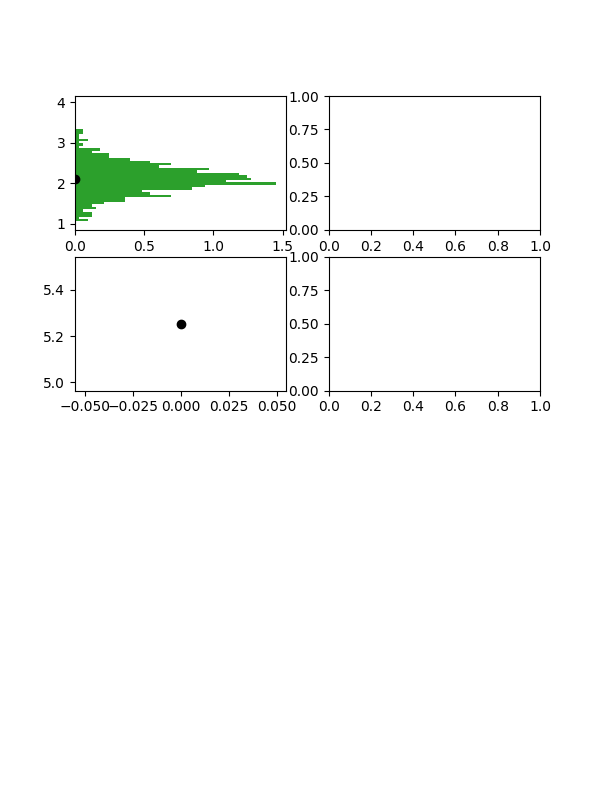

In [ ]:
from inference.utils.utils import p_nu
from DM_theory.functions import get_alpha_0, get_nu_bar
from matplotlib import cm
from matplotlib.colors import Normalize

%matplotlib ipympl

fig = plt.figure(figsize=(6,8))
ax_gamma = fig.add_subplot(421)
ax_delta = fig.add_subplot(423)
ax_nu_bar = fig.add_subplot(422)
ax_alpha_0 = fig.add_subplot(424)

nu_cut = 10.

# params = build_distr_structure_from_params(res[0], BM.paramIn)
nu_array = np.linspace(
    0,
    # params["distr"][0]["nu_max"],
	nu_cut,
    1001,
    # np.ceil(params["distr"][0]["nu_max"] * T + 1.0).astype(int),
)

nbins = 11
spike_count_hist = np.zeros((nbins, len(res)))

p_nu_mesh = np.zeros((len(nu_array), len(res)))

gamma_arr = np.linspace(1, 4, 51)

for i, (angle, params) in enumerate(res.items()):

	color = plt.cm.grey(i / len(res))

	mean = get_mean_from_sampler(res[angle], BM.paramNames, mode="dynesty")
	mean["nu_max_0"] = prior["nu_max_0"]["parameters"]["value"][0]
	print(mean)
	# res[angle] = mean

	params = build_distr_structure_from_params(mean, BM.paramIn)
	print(params)

	ax_gamma.plot(angle, mean["gamma_0"], "o", color=color)
	ax_gamma.hist(res[0]["samples"][:, 0], bins=gamma_arr, density=True, orientation="horizontal",bottom=angle,color="tab:green")#,histtype="step")


	ax_delta.plot(angle, mean["delta_0"], "o", color=color)
	# params = build_distr_structure_from_params(res[angle], BM.paramIn)

	p_nu_mesh[:, i] = p_nu(nu_array, params)
	# ax_distr.plot(nu, p_nu(nu,params), label=f"Angle {angle}",color=color)

	alpha_0 = get_alpha_0(**params["distr"][0])  # This will print the alpha_0 value
	nu_bar = get_nu_bar(**params["distr"][0])  # This will print the nu
	print(f"Angle {angle}: alpha_0 = {alpha_0}, nu_bar = {nu_bar}")

	ax_alpha_0.plot(angle, alpha_0, "o", color=color)
	ax_nu_bar.plot(angle, nu_bar, "o", color=color,label="inferred" if i==0 else None)

	spike_counts = (
		df_cond.filter(pl.col("angle") == angle)["rate"].to_numpy().astype(np.float64)
	)

	spike_count_hist[:,i], bin_edges = np.histogram(spike_counts / T, bins=nbins, range=(0, nu_cut), density=True)

	# Optionally, store or plot hist for each angle if needed
	nu_bar_emp = spike_counts.mean() / T
	ax_nu_bar.plot(angle, nu_bar_emp, "rx",label="empirical" if i==0 else None)#, color=color)

plt.setp(ax_gamma, xlabel="orientation", ylabel="$\gamma$")
plt.setp(ax_delta, xlabel="orientation", ylabel="$\delta$")
plt.setp(ax_nu_bar, xlabel="orientation", ylabel="$\\nu_{bar}$")
plt.setp(ax_alpha_0, xlabel="orientation", ylabel="$\\alpha_0$")
for axx in [ax_gamma, ax_delta, ax_nu_bar, ax_alpha_0]:
	axx.spines[["top", "right"]].set_visible(False)
ax_nu_bar.legend()

ax_spike_counts = fig.add_subplot(223,projection='3d')
ax_distr = fig.add_subplot(224,projection='3d')


# 3D histogram of spike counts for each angle
xpos, ypos = np.meshgrid(bin_edges[:-1] + (bin_edges[1] - bin_edges[0]) / 2, unique_angles)
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

dx = (bin_edges[1] - bin_edges[0]) * 0.8
dy = (unique_angles[1] - unique_angles[0]) * 0.8 if len(unique_angles) > 1 else 1
dz = spike_count_hist.T.flatten()

# Normalize dz for coloring
norm_hist = Normalize(vmin=dz.min(), vmax=0.5)
colors_hist = cm.jet(norm_hist(dz))

ax_spike_counts.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True, alpha=0.5, color=colors_hist, zsort='average')

plt.setp(ax_spike_counts, xlabel='$\\nu$ [Hz]', ylabel='orientation', zlabel='p_nu', xlim=[0, nu_cut],zlim=[0,0.6])
ax_spike_counts.set_title("spike counts")

X, Y = np.meshgrid(nu_array, unique_angles)
Z = p_nu_mesh.T  # shape: (len(angle_array), len(nu_array))

# Normalize Z for coloring
norm = Normalize(vmin=Z[np.isfinite(Z)].min(), vmax=0.5)
face_colors = cm.jet(norm(Z))

Z[:,0] =np.nan

surf = ax_distr.plot_surface(X, Y, Z, 
	facecolors=face_colors,
    edgecolor='none', 
    rstride=1, cstride=1, 
    antialiased=True)
surf.set_alpha(1.0)
plt.setp(ax_distr, xlabel='$\\nu$ [Hz]', ylabel='orientation', zlabel='p_nu',zlim=[0,0.6])
ax_distr.set_title("inferred distribution")
plt.suptitle(f"Condition {mode}")
plt.savefig(f"TreueData_analysis_{mode}_015.png", dpi=300)
# plt.show()

{'distr': [{'gamma': 1.5165431884263554, 'delta': 4.149551859722681, 'nu_max': 25.0}]}


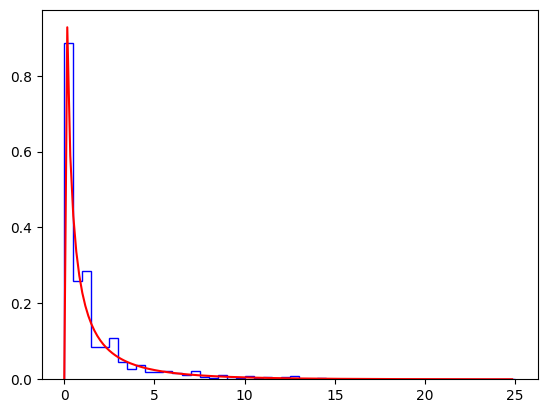

In [ ]:
mean["nu_max_0"] = prior["nu_max_0"]["parameters"]["value"][0]

plt.figure()
n_steps = 51
_ = plt.hist(
    spike_counts / 6,
    bins=np.linspace(0, mean["nu_max_0"], n_steps),
    histtype="step",
    label="angle 0",
    color="blue",
    density=True,
)

dnu = mean["nu_max_0"] / n_steps

params = build_distr_structure_from_params(mean, BM.paramIn)
print(params)

nu = np.linspace(0, mean["nu_max_0"], np.ceil(mean["nu_max_0"] * T + 1.0).astype(int))
plt.plot(nu, p_nu(nu, params), "r-", label="p_nu")


# from dynesty import utils as dyfunc, plotting as dyplot
# dyplot.cornerplot(
#     sampler.results,
#     color="dodgerblue",
#     # truths=truth_values,
#     show_titles=True,
# )
# plt.show(block=False)

In [ ]:
mode = "dynesty"
mean = {}
for i, key in enumerate(BM.paramNames):
    if mode == "dynesty":
        samp = sampler.results.samples[:, i]
        weights = sampler.results.importance_weights()
    else:
        samp = sampler.results["weighted_samples"]["points"][:, i]
        weights = sampler.results["weighted_samples"]["weights"]

    mean[key] = (samp * weights).sum()
    print(f"{key} mean: {mean[key]}")

gamma_0 mean: 1.5144112832857677
delta_0 mean: 4.185123503482691
nu_max_0 mean: 27.83969998051562


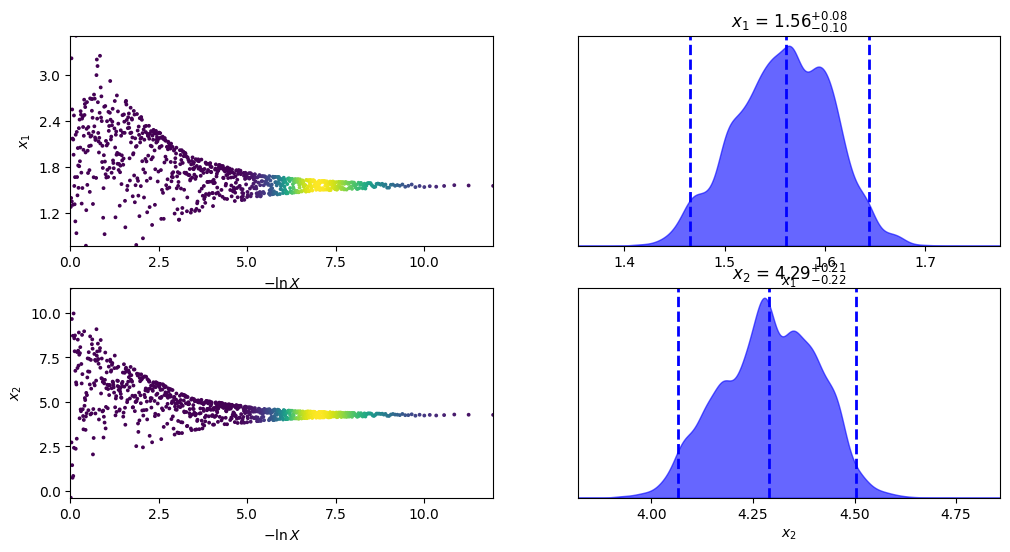

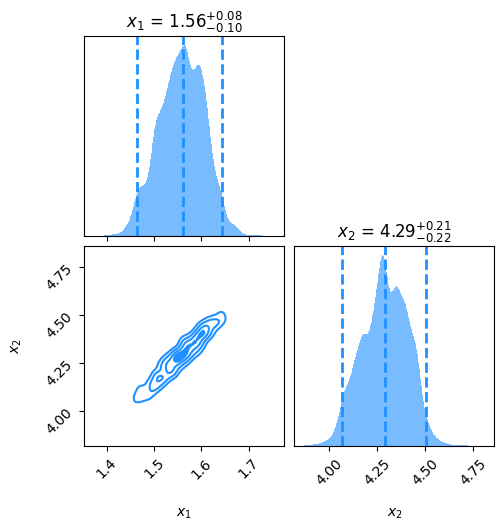

In [ ]:
dyplot.traceplot(
    sampler.results,
    # truths=truth_values,
    truth_color="black",
    show_titles=True,
    trace_cmap="viridis",
)
plt.show(block=False)
dyplot.cornerplot(
    sampler.results,
    color="dodgerblue",
    # truths=truth_values,
    show_titles=True,
)
plt.show(block=False)

In [58]:
BM.binom[0]["log_binomial_coefficient"][600]

835.575718826994

In [ ]:
from scipy.special import binom as sp_binom, comb
from scipy import special, exp, log

lgam = special.gammaln


def log_binomial(n, k):
    return lgam(n + 1) - lgam(n - k + 1) - lgam(k + 1)


# binom = sp_binom(BM.data['nNeurons'][0],np.arange(BM.data['nNeurons'][0]+1))
# binom = sp_binom(BM.data['nNeurons'][0],400)

binom = log_binomial(BM.data["nNeurons"][0], np.arange(10))
print(binom)

# binom = comb(BM.data['nNeurons'][0],400,exact=True)
# # print(np.log(binom))
# print(binom)
# binom[800:900]

[ 0.          7.09920174 13.5044302  19.50336676 25.21379378 30.70024909
 36.003554   41.15187869 46.16584178 51.06119092]


In [63]:
p_in = np.array([1.7, 3.9])

my_likelihood = BM.set_logl(
    vectorized=vectorized,
    correct_N=0,
    bias_to_expected_max=0,
    bias_to_mean=0,
    biological=False,
)
my_likelihood(p_in)

-1181.8931599756434

In [35]:
BM.priors

{'gamma_0': {'n': 1,
  'idx': 0,
  'transform': <function inference.HierarchicalModelDefinition.HierarchicalModel.set_prior_param.<locals>.<lambda>(x, params={'mean': 2.0, 'sigma': 0.5}, fun=<function <lambda> at 0x709b9d0203a0>)>},
 'delta_0': {'n': 1,
  'idx': 1,
  'transform': <function inference.HierarchicalModelDefinition.HierarchicalModel.set_prior_param.<locals>.<lambda>(x, params={'mean': 6.0, 'sigma': 2.0}, fun=<function <lambda> at 0x709b9d0203a0>)>},
 'nu_max_0': {'n': 1, 'idx': 2, 'value': [25.0], 'transform': None}}